# Credit Card Fraud Detection using Deep Learning

## Introduction

### Relevant Background Information

Detecting credit card fraud, where fake card numbers are used, is a critical challenge for financial institutions and merchants. In this context, fake card numbers typically refer to numbers that do not correspond to valid credit cards issued by any legitimate financial institution. Detecting such fraudulent transactions involves a combination of data analysis, pattern recognition, and deep learning techniques. Creating a Artificial Neural Network is one of the many tools available to create a model for detecting this type of credit card fraud. 

### Predictive Question

Can I use Deep Learning to classify a credit card number as fraud or legitimate?

### Dataset

The dataset used in this project comes from: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

## Data Analysis

### Gather Data

Load the dataset to a Pandas DataFrame

In [1]:
import pandas as pd

In [2]:
credit_card_data = pd.read_csv('data/creditcard.csv')
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Analysis

Dataset Information

In [3]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Checking the number of missing values in each column

In [4]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Distribution of legit transactions & fraudulent transactions

In [5]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class'>

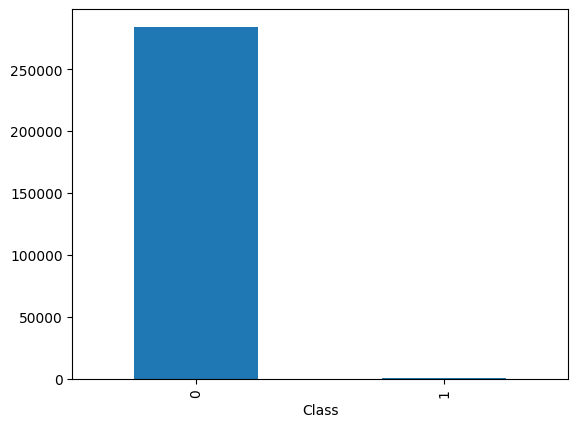

In [6]:
pd.Series(credit_card_data['Class']).value_counts().plot.bar()

#### Conclusion

The dataset is highly imbalanced:
- 0: Normal Transaction
- 1: Fraudulent Transaction

## Methods

We will start by preparing the data to be used in the model. Then, we will create an ANN which will identify whether it is a legitimate or fraudulent credit card.

### Splitting the data into Features & Targets

In [7]:
X = credit_card_data.drop(columns='Class', axis=1)
Y = credit_card_data['Class']

In [8]:
print(X)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [9]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


### Splitting the data into Testing and Training Data

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [11]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [13]:
Y_train.value_counts()

Class
0    227454
1       391
Name: count, dtype: int64

### Creating Torch Dataset and Loader

In [14]:
import torch

In [15]:
train_ds = torch.utils.data.TensorDataset(torch.tensor(X_train).float(), torch.tensor(Y_train.to_numpy()).float())
valid_ds = torch.utils.data.TensorDataset(torch.tensor(X_test).float(), torch.tensor(Y_test.to_numpy()).float())

train_dl = torch.utils.data.DataLoader(train_ds, batch_size=100)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=100)

### Creating and Training the Model

In [64]:
# Import necessary libraries
import numpy as np
import torch.nn as nn
import torch.optim as optim

In [61]:
# Creating the Model

class Classifier(nn.Module):
    def __init__(self, n_input):
        super().__init__()
        self.l1 = nn.Linear(n_inputs, 64)
        self.l2 = nn.Linear(64, 64)
        self.l3 = nn.Linear(64, 64)
        self.l4 = nn.Linear(64, 64)
        self.l5 = nn.Linear(64, 64)
        self.l6 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.drop_out = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.l1(x))
        x = self.relu(self.l2(x))
        x = self.relu(self.l3(x))
        x = self.relu(self.l4(x))
        x = self.relu(self.l5(x))
        x = self.drop_out(x)
        return self.l6(x).squeeze()

n_inputs = X_train.shape[1]
model = Classifier(n_inputs)

In [62]:
# Training the Model
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
loss_func = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)

def loss_calc(xb, yb, opt=None):
    loss = loss_func(model(xb), yb)
    if opt is not None:
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss.item(), len(xb)

EPOCHS = 50

for epoch in range(EPOCHS):
    model.train()
    
    for xb, yb in train_dl:
        loss_calc(xb, yb, optimizer)
        
    model.eval()
    
    with torch.no_grad():
        losses, nums = zip(*[loss_calc(xb, yb) for xb, yb in valid_dl])
        
    val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
    print(epoch, val_loss)

0 0.050256293058190814
1 0.04996378344368996
2 0.049528857917690954
3 0.04903870660663925
4 0.04839527183806004
5 0.04749800100960386
6 0.04611754125155296
7 0.043960221899855614
8 0.0406445783759582
9 0.036414863443148794
10 0.03139335063687777
11 0.02679952569274505
12 0.022949160563855545
13 0.01966876230365264
14 0.017927275840437136
15 0.017003488718882045
16 0.016245697160172354
17 0.015572011934446971
18 0.014987153063706796
19 0.014261956564630049
20 0.013712110791020214
21 0.013291149794272426
22 0.012814872366258535
23 0.012382992870300456
24 0.01210523447527495
25 0.011841771654177248
26 0.011514494470628592
27 0.01137030397782516
28 0.01119840815848868
29 0.010991521806996906
30 0.010826323119083365
31 0.010973439716596669
32 0.010637235378692166
33 0.010675503929297982
34 0.010605220716513966
35 0.010399827164494103
36 0.010523974678747208
37 0.0104146516977763
38 0.010431355613500677
39 0.010278105332627248
40 0.010239904397336895
41 0.010213736382661799
42 0.010371241440

### Model Analysis

In [86]:
from sklearn import metrics
Y_pred = model(torch.tensor(X_test).float()).detach().numpy()

Y_pred[Y_pred>=0.5] =1.0
Y_pred[Y_pred<0.5] =0.0

print('Confusion matrix: (Actual on X, Predicted on Y) \n {} \n'. format(metrics.confusion_matrix(Y_test, Y_pred)))
print('AUPRC score: {} \n'. format(metrics.average_precision_score(Y_test, Y_pred)))
print('AUROC score: {} \n'.format(metrics.roc_auc_score(Y_test, Y_pred)))
print('Accuracy score: {} \n'.format(metrics.accuracy_score(Y_test, Y_pred)))
print(metrics.classification_report(Y_test, Y_pred))

Confusion matrix: (Actual on X, Predicted on Y) 
 [[56845    16]
 [   18    83]] 

AUPRC score: 0.6892848970301334 

AUROC score: 0.9107503951358888 

Accuracy score: 0.999403110845827 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.84      0.82      0.83       101

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



## Discussion

In this section, we will analyze and discuss the results obtained from our experiment, which focused on building a model for the detection of fraudulent transactions.

### Model Performance Metrics

#### 1. Confusion Matrix

Where the actual values are on X, while the predicted values are on Y
```
Actual         Fraud      Normal
Predicted                     
Fraud          56845          16
Normal            18          83 
```

The confusion matrix provides a detailed breakdown of the model's performance. It is structured as follows:

- True Positives (TP): Our model correctly predicted 56845 fraudulent transactions as fraudulent.
- False Positives (FP): The model incorrectly predicted 16 non-fraudulent transactions as fraudulent.
- False Negatives (FN): The model incorrectly predicted 18 fraudulent transactions as non-fraudulent.
- True Negatives (TN): Our model correctly predicted 83 non-fraudulent transactions as non-fraudulent.

#### 2. Area Under the Precision-Recall Curve (AUPRC):
AUPRC Score: 0.6893
The AUPRC score is a valuable metric for imbalanced datasets like ours. It measures the area under the precision-recall curve, which provides insights into the model's performance, particularly in the context of detecting the minority class (fraudulent transactions). An AUPRC score of 0.6893 indicates that our model achieves a reasonable balance between precision and recall.

#### 3. Area Under the Receiver Operating Characteristic Curve (AUROC):
AUROC Score: 0.9108
The AUROC score measures the area under the receiver operating characteristic curve, which assesses the model's ability to distinguish between the two classes. An AUROC score of 0.9108 suggests that our model exhibits strong discriminatory power and performs well in classifying transactions.

#### 4. Accuracy Score:
Accuracy Score: 99.94%
The accuracy score represents the proportion of correctly classified instances. While a high accuracy score is indicative of model performance, it should be interpreted with caution in imbalanced datasets. In our case, the high accuracy is largely influenced by the large number of true negatives (non-fraudulent transactions).

#### 5. Precision, Recall, and F1-Score
The precision, recall, and F1-score provide a more comprehensive evaluation of our model's performance, especially in the context of classifying fraudulent transactions (class 1):

- **Precision (for class 1): 0.84** Precision measures the proportion of true positive predictions among all positive predictions. In our case, it indicates that when our model predicts a transaction as fraudulent, it is correct approximately 84% of the time.
- **Recall (for class 1): 0.82** Recall (or sensitivity) measures the proportion of true positives correctly identified by our model among all actual fraudulent transactions. An 82% recall rate indicates that our model captures 82% of the actual fraudulent transactions.
- **F1-Score (for class 1): 0.83** The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's accuracy in identifying true positive cases while minimizing false positives and false negatives.

#### Model Evaluation Summary
Our model demonstrates strong performance in detecting fraudulent transactions, as evidenced by the following:

- High AUROC and AUPRC scores indicate effective discrimination between classes.
- High accuracy reflects the overall performance.
- Precision, recall, and F1-score values for class 1 highlight the model's ability to correctly classify fraudulent transactions while minimizing false positives.

### Implications and Further Steps

These results are promising for the development of a fraud detection system. However, several considerations and areas for improvement should be noted:
- Class Imbalance: Our dataset is highly imbalanced, with a significantly larger number of non-fraudulent transactions. While our model performs well, further techniques like resampling methods or different cost-sensitive learning approaches can be explored to improve minority class detection.
- Model Robustness: Extensive testing on unseen data is required to assess the model's generalization capabilities. Continual monitoring and retraining of the model are crucial to adapt to evolving fraud patterns.
- Feature Engineering: Further feature engineering and exploration may lead to improved model performance. Additional domain-specific features could enhance the model's ability to identify fraud.
- Model Explainability: Understanding the features and factors contributing to model predictions is essential, especially in the financial sector. Employing interpretability techniques can aid in model explainability.

### Conclusion

In conclusion, our model exhibits strong performance in detecting fraudulent transactions, but it should be considered a part of a broader fraud detection strategy. Further refinement and monitoring are necessary to ensure the continued effectiveness of the system in a dynamic and evolving environment.

## Works Cited

- Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015
- Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon
- Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE
- Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)
- Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier
- Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing
- Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019
- Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019
- Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook
- Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, IInternational Journal of Data Science and Analytics